Importing libraries

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()
%matplotlib inline
import datetime as dt
from scipy import stats
import statsmodels.api as sm

In [7]:
sec_data = pd.read_csv('/content/365DSc-KO-NDX-2016-2020.csv')
sec_data.head()

,Date,KO,^NDX
0,2016-01-04,35.693829,4497.859863
1,2016-01-05,35.820095,4484.180176
2,2016-01-06,35.626476,4443.990234
3,2016-01-07,35.037189,4305.720215
4,2016-01-08,34.944588,4270.779785


In [8]:
sec_data[['KO','^NDX']]

,KO,^NDX
0,35.693829,4497.859863
1,35.820095,4484.180176
2,35.626476,4443.990234
3,35.037189,4305.720215
4,34.944588,4270.779785
...,...,...
1254,52.998867,12711.009766
1255,53.712925,12838.860352
1256,53.683174,12843.490234
1257,53.990612,12845.360352


In [9]:
x = sec_data['KO']
y = sec_data['^NDX']

In [11]:
x1 = sm.add_constant(x)
reg = sm.OLS(y,x1).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   ^NDX   R-squared:                       0.621
Model:                            OLS   Adj. R-squared:                  0.621
Method:                 Least Squares   F-statistic:                     2063.
Date:                Sun, 19 May 2024   Prob (F-statistic):          2.15e-267
Time:                        08:38:54   Log-Likelihood:                -10791.
No. Observations:                1259   AIC:                         2.159e+04
Df Residuals:                    1257   BIC:                         2.160e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -5774.9195    284.624    -20.290      0.000   -6333.310   -5216.529
KO           299.1508      6.586     45.423      0.000     286.230     312.071
==============================================================================
Omnibus:                      114.512   Durbin-Watson:                   0.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              145.526
Skew:                           0.828   Prob(JB):                     2.51e-32
Kurtosis:                       3.174   Cond. No.                         342.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [41]:
ko_log_returns = np.log(sec_data['KO']/sec_data['KO'].shift(1))
nd_log_returns = np.log(sec_data['^NDX']/sec_data['^NDX'].shift(1))
ko_log_returns,nd_log_returns

(0            NaN
 1       0.003531
 2      -0.005420
 3      -0.016679
 4      -0.002646
           ...   
 1254    0.006759
 1255    0.013383
 1256   -0.000554
 1257    0.005711
 1258    0.007321
 Name: KO, Length: 1259, dtype: float64,
 0            NaN
 1      -0.003046
 2      -0.009003
 3      -0.031608
 4      -0.008148
           ...   
 1254    0.004563
 1255    0.010008
 1256    0.000361
 1257    0.000146
 1258    0.003336
 Name: ^NDX, Length: 1259, dtype: float64)

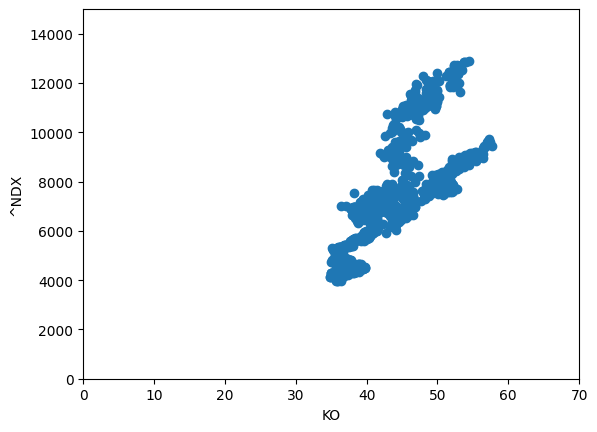

In [43]:
plt.scatter(x,y)
plt.axis([0,70,0,15000])
plt.xlabel('KO')
plt.ylabel('^NDX')
plt.show()

In [14]:
# Identify string columns
string_cols = []
for col in sec_data.columns:
    if sec_data[col].dtype == 'object':
        string_cols.append(col)

# Exclude string columns from division
numeric_cols = [col for col in sec_data.columns if col not in string_cols]
sec_returns = np.log(sec_data[numeric_cols]/sec_data[numeric_cols].shift(1))

Covariance of the coca-cola & Nasdaq

In [16]:
cov = sec_returns.cov() *250
cov

,KO,^NDX
KO,0.040051,0.022532
^NDX,0.022532,0.049457


In [40]:
market_var = cov.iloc[1,1]
cov_with_market = cov.iloc[0,1]
market_var, cov_with_market

(0.04945651805913889, 0.022531719013732566)

Coca-Cola's Beta

In [39]:
ko_beta = cov_with_market/market_var
ko_beta

0.45558644033107404

Expected rate of return

In [28]:
ko_er = 0.025 + 0.45559 * (0.2 - 0.025)
ko_er

0.10472825

Sharpe Ratio

In [30]:
sharpe  = (ko_er - 0.025)/(sec_returns['KO'].std()*250**0.5)
sharpe

0.39838956348662435